In this notebook we'll search for any connections between the answers each person answered and his living place.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv('responses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [3]:
#slicing the wanted cols- life interests and the village/city

cols_to_drop = list(range(31)) + list(range(63, 148)) + list(range(149, 150))
lifeInterestsDf = df.drop(df.columns[cols_to_drop], axis=1)

lifeInterestsDf.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Village - town
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,village
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,city
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,city
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,city
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,village


In [4]:
lifeInterestsDf['Village - town'] = lifeInterestsDf['Village - town'].replace({'village': 1, 'city': 0})

In [5]:
lifeInterestsDf.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Village - town
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,0.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,0.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,0.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0


In [6]:
# removing missing values
lifeInterestsDf.dropna(axis=0,inplace = True)

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lifeInterestsDf.iloc[:, :-1], lifeInterestsDf.iloc[:, -1], test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.7344632768361582


In [8]:
#preform a feature selection to get an idea what features are more importent
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Separate the features and target variable
X = lifeInterestsDf.drop('Village - town', axis=1)
y = lifeInterestsDf['Village - town']

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier and get feature importances
rf.fit(X, y)
importances = rf.feature_importances_

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)


                   feature  importance
17                Religion    0.042124
24               Gardening    0.038583
27  Science and technology    0.035561
6                       PC    0.035375
1               Psychology    0.034965
31                    Pets    0.034538
2                 Politics    0.034392
30       Adrenaline sports    0.033804
18   Countryside, outdoors    0.033627
23            Active sport    0.033460
11               Geography    0.033436
26                Shopping    0.032842
16         Art exhibitions    0.032238
7       Economy Management    0.032173
19                 Dancing    0.031924
28                 Theatre    0.031840
0                  History    0.031468
8                  Biology    0.030812
12       Foreign languages    0.030704
22           Passive sport    0.030685
10                 Reading    0.030514
13                Medicine    0.030451
15                    Cars    0.029883
14                     Law    0.029736
3              Mathematic

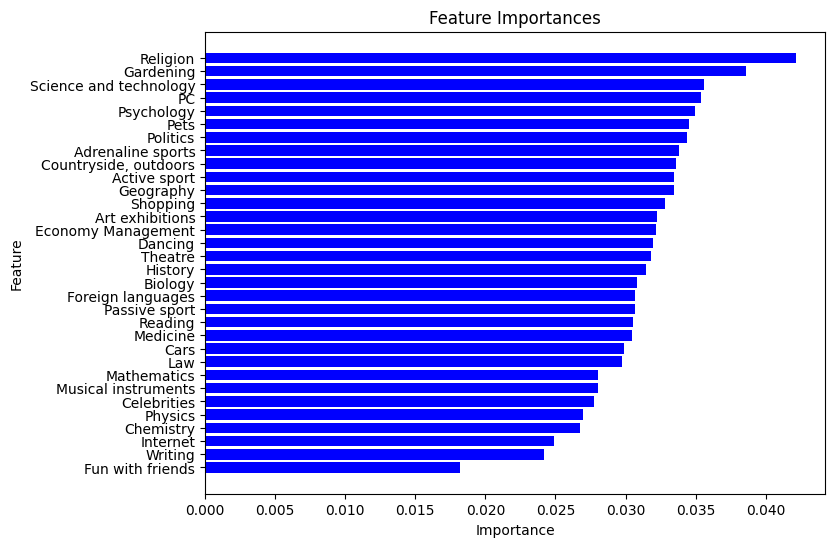

In [9]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar chart
ax.barh(feature_importances['feature'], feature_importances['importance'], color='blue')

# Add axis labels and title
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances')

# Invert the y-axis so that the most important features are at the top
ax.invert_yaxis()

# Show the plot
plt.show()



In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5932203389830508


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lifeInterestsDf.drop('Village - town', axis=1), lifeInterestsDf['Village - town'], test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances using permutation importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': X_test.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)


                   feature    importance
31                    Pets  1.581921e-02
6                       PC  1.129944e-02
7       Economy Management  1.129944e-02
28                 Theatre  1.016949e-02
5                 Internet  9.604520e-03
3              Mathematics  9.604520e-03
16         Art exhibitions  9.039548e-03
8                  Biology  7.909605e-03
17                Religion  7.344633e-03
27  Science and technology  6.779661e-03
19                 Dancing  6.214689e-03
26                Shopping  6.214689e-03
29        Fun with friends  6.214689e-03
30       Adrenaline sports  4.519774e-03
18   Countryside, outdoors  3.954802e-03
10                 Reading  3.389831e-03
12       Foreign languages  3.389831e-03
11               Geography  2.824859e-03
22           Passive sport  1.129944e-03
0                  History  1.129944e-03
20     Musical instruments  3.330669e-17
23            Active sport -1.129944e-03
2                 Politics -1.129944e-03
1               

find a connection between the genders.

In [13]:
#slicing the wanted cols- life interests and the Gender

cols_to_drop = list(range(31)) + list(range(63, 144)) + list(range(145, 150))
lifeInterests1Df = df.drop(df.columns[cols_to_drop], axis=1)

lifeInterests1Df.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Gender
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,female
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,female
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,female
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,female
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,female


In [14]:
lifeInterests1Df['Gender'] = lifeInterests1Df['Gender'].replace({'male': 1, 'female': 0})

In [15]:
# removing missing values
lifeInterests1Df.dropna(axis=0,inplace = True)

In [16]:
lifeInterests1Df.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Gender
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,0.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,0.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,0.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,0.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,0.0


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lifeInterests1Df.iloc[:, :-1], lifeInterests1Df.iloc[:, -1], test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8700564971751412


In [18]:
# Separate the features and target variable
X = lifeInterests1Df.drop('Gender', axis=1)
y = lifeInterests1Df['Gender']

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the classifier and get feature importances
rf.fit(X, y)
importances = rf.feature_importances_

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)


                   feature  importance
6                       PC    0.101263
15                    Cars    0.079512
26                Shopping    0.072517
28                 Theatre    0.061530
10                 Reading    0.058815
27  Science and technology    0.056376
19                 Dancing    0.047039
4                  Physics    0.039553
23            Active sport    0.030877
12       Foreign languages    0.029614
25             Celebrities    0.026321
2                 Politics    0.024936
24               Gardening    0.024730
30       Adrenaline sports    0.024577
16         Art exhibitions    0.023866
0                  History    0.022542
31                    Pets    0.022407
1               Psychology    0.020178
13                Medicine    0.020024
22           Passive sport    0.019556
11               Geography    0.019282
8                  Biology    0.018102
7       Economy Management    0.017408
14                     Law    0.016940
3              Mathematic

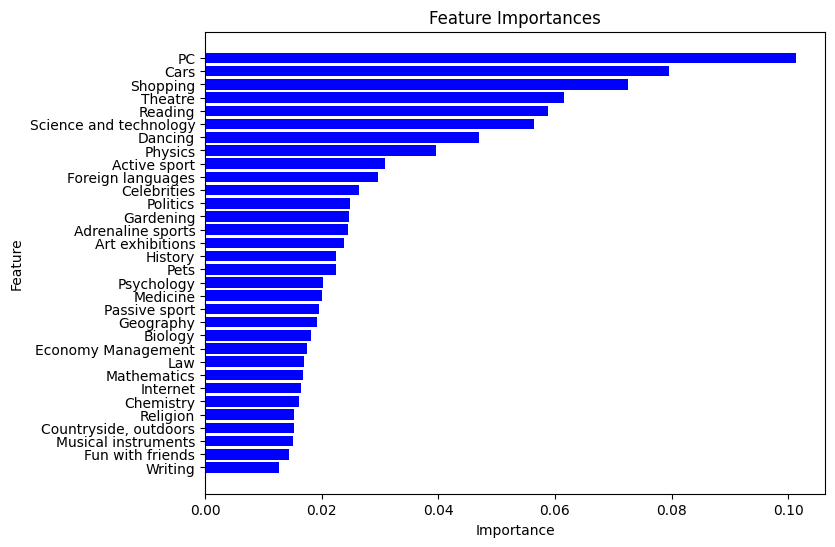

In [19]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar chart
ax.barh(feature_importances['feature'], feature_importances['importance'], color='blue')

# Add axis labels and title
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importances')

# Invert the y-axis so that the most important features are at the top
ax.invert_yaxis()

# Show the plot
plt.show()

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.711864406779661


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lifeInterests1Df.drop('Gender', axis=1), lifeInterests1Df['Gender'], test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances using permutation importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': X_test.columns, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances)

                   feature  importance
6                       PC    0.043503
26                Shopping    0.040113
15                    Cars    0.021469
27  Science and technology    0.019209
19                 Dancing    0.012429
11               Geography    0.011864
23            Active sport    0.011299
4                  Physics    0.008475
28                 Theatre    0.007910
22           Passive sport    0.006780
17                Religion    0.004520
10                 Reading    0.004520
29        Fun with friends    0.003955
9                Chemistry    0.002825
16         Art exhibitions    0.002825
20     Musical instruments    0.002825
14                     Law    0.002825
0                  History    0.002825
2                 Politics    0.001130
21                 Writing    0.000565
7       Economy Management    0.000565
3              Mathematics   -0.001130
30       Adrenaline sports   -0.001130
31                    Pets   -0.001130
8                  Biolog